https://www.kaggle.com/datasets/nani123456789/taxi-trip-fare-prediction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv("car_fare_train.csv")
df_test = pd.read_csv("car_fare_test.csv")

In [3]:
df_train.skew()

trip_duration          16.233247
distance_traveled     456.516156
num_of_passengers       3.764228
fare                    8.399862
tip                    17.911359
miscellaneous_fees      2.337464
total_fare              6.493129
surge_applied           0.977081
dtype: float64

In [4]:
df_train.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1
3,671.0,5.63,3.0,90.00,0,9.750,99.750,0
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0


In [5]:
df_train.isnull().sum() * 100

trip_duration         0
distance_traveled     0
num_of_passengers     0
fare                  0
tip                   0
miscellaneous_fees    0
total_fare            0
surge_applied         0
dtype: int64

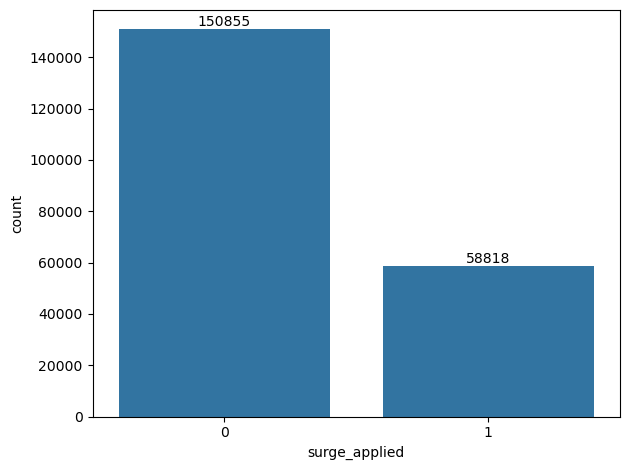

In [6]:
axis = sns.countplot(x = df_train["surge_applied"])
for container in axis.containers:
    axis.bar_label(container)
plt.tight_layout()
plt.show()

<Axes: xlabel='trip_duration', ylabel='Density'>

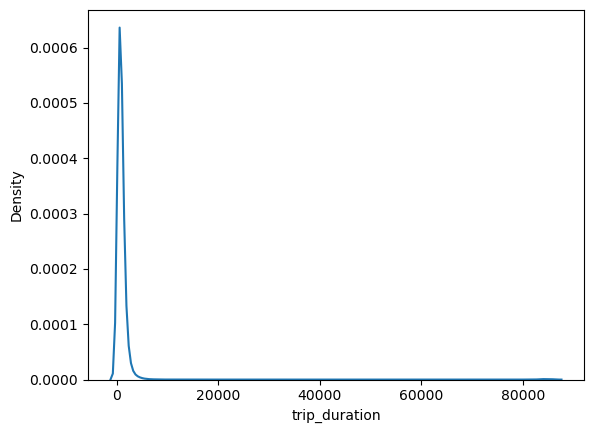

In [7]:
sns.kdeplot(x = df_train["trip_duration"])

<Axes: xlabel='trip_duration'>

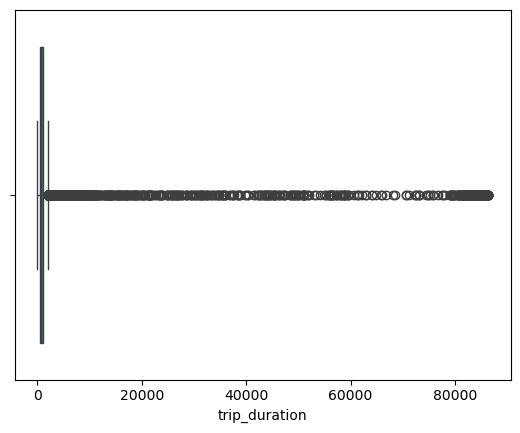

In [8]:
sns.boxplot(x = df_train["trip_duration"])

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209673 entries, 0 to 209672
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   trip_duration       209673 non-null  float64
 1   distance_traveled   209673 non-null  float64
 2   num_of_passengers   209673 non-null  float64
 3   fare                209673 non-null  float64
 4   tip                 209673 non-null  int64  
 5   miscellaneous_fees  209673 non-null  float64
 6   total_fare          209673 non-null  float64
 7   surge_applied       209673 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 12.8 MB


In [10]:
df_train.describe()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
count,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000
mean,1173.181478,5.054431,1.292808,99.623431,13.030824,15.136829,127.791084,0.280523
std,4775.653621,125.217419,0.930754,85.602702,20.367764,12.553436,98.797374,0.449256
min,0.000000,0.020000,0.000000,0.000000,0.000000,-0.500000,0.000000,0.000000
25%,446.000000,1.950000,1.000000,52.500000,0.000000,6.000000,70.200000,0.000000
50%,707.000000,3.200000,1.000000,75.000000,9.000000,9.750000,101.700000,0.000000
75%,1098.000000,5.730000,1.000000,116.250000,20.000000,26.450000,152.250000,1.000000
max,86387.000000,57283.910000,9.000000,4466.250000,2500.000000,435.000000,4472.250000,1.000000


In [12]:
numerical_cols = ["trip_duration", "distance_traveled", "fare", "tip", "miscellaneous_fees"]
df_train[numerical_cols] = np.log(df_train[numerical_cols] + 1)

In [13]:
df_test[numerical_cols] = np.log(df_test[numerical_cols] + 1)

C:\Users\Zohaib Ali Singay\AppData\Local\Temp\ipykernel_18116\3340172357.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df_train[numerical_cols[k]], kde = True, ax = axis[i][j])
C:\Users\Zohaib Ali Singay\AppData\Local\Temp\ipykernel_18116\3340172357.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


IndexError: list index out of range

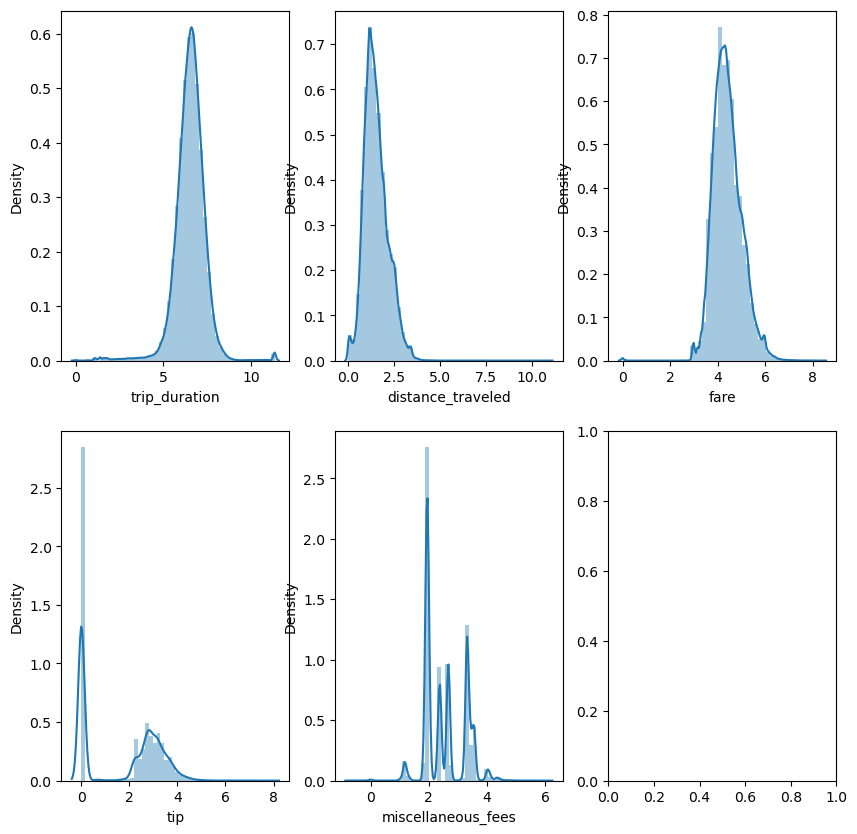

In [14]:
fig, axis = plt.subplots(nrows = 2, ncols = 3, figsize = (10, 10))
k = 0
for i in range(2):
    if k == 5:
        break
    for j in range(3):
        # df_train[numerical_cols[k]] = np.log{df[numerical_cols[k]] + 1}
        # df_test[numerical_cols[k]] = np.log(df[numerical_cols[k]] + 1)
        sns.distplot(x = df_train[numerical_cols[k]], kde = True, ax = axis[i][j])
        axis[i][j].set_xlabel(numerical_cols[k])
        k = k + 1
plt.tight_layout()
plt.show()

In [15]:
df_train.skew()

trip_duration        -0.719375
distance_traveled     0.593809
num_of_passengers     3.764228
fare                  0.233546
tip                   0.010230
miscellaneous_fees    0.320350
total_fare            6.493129
surge_applied         0.977081
dtype: float64

<Axes: xlabel='trip_duration'>

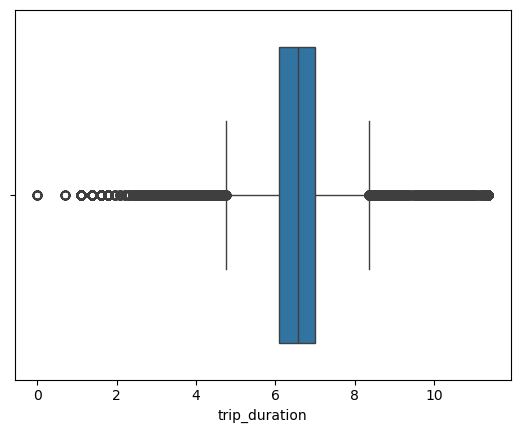

In [16]:
sns.boxplot(x = df_train["trip_duration"])

In [17]:
df_train.describe()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
count,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000
mean,6.527056,1.525915,1.292808,4.412811,1.671279,2.535112,127.791084,0.280523
std,0.871260,0.635180,0.930754,0.600573,1.559067,0.687020,98.797374,0.449256
min,0.000000,0.019803,0.000000,0.000000,0.000000,-0.693147,0.000000,0.000000
25%,6.102559,1.081805,1.000000,3.979682,0.000000,1.945910,70.200000,0.000000
50%,6.562444,1.435085,1.000000,4.330733,2.302585,2.374906,101.700000,0.000000
75%,7.002156,1.906575,1.000000,4.764308,3.044522,3.312366,152.250000,1.000000
max,11.366604,10.955793,9.000000,8.404528,7.824446,6.077642,4472.250000,1.000000


In [18]:
for i in numerical_cols:
    Q1_train = df_train[i].quantile(0.25)
    Q3_train = df_train[i].quantile(0.75)

    Q1_test = df_test[i].quantile(0.25)
    Q3_test = df_test[i].quantile(0.75)

    IQR_train = Q3_train - Q1_train
    IQR_test = Q3_test - Q3_test

    lower_bound_train = IQR_train - 1.5 * Q1_train
    upper_bound_train = IQR_train + 1.5 * Q3_train

    lower_bound_test = IQR_test - 1.5 * Q1_test
    upper_bound_test = IQR_test + 1.5 * Q3_test

    df_train[(df_train[i] < lower_bound_train)][i] = lower_bound_train
    df_train[(df_train[i] > upper_bound_train)][i] = upper_bound_train

    df_test[(df_test[i] < lower_bound_test)][i] = lower_bound_test
    df_test[(df_test[i] > upper_bound_test)][i] = upper_bound_test

C:\Users\Zohaib Ali Singay\AppData\Local\Temp\ipykernel_18116\2475596306.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[(df_test[i] > upper_bound_test)][i] = upper_bound_test
C:\Users\Zohaib Ali Singay\AppData\Local\Temp\ipykernel_18116\2475596306.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[(df_train[i] > upper_bound_train)][i] = upper_bound_train
C:\Users\Zohaib Ali Singay\AppData\Local\Temp\ipykernel_18116\2475596306.py:21: SettingWithCopyWarning: 
A value is trying to be s

In [19]:
df_train.describe()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
count,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000
mean,6.527056,1.525915,1.292808,4.412811,1.671279,2.535112,127.791084,0.280523
std,0.871260,0.635180,0.930754,0.600573,1.559067,0.687020,98.797374,0.449256
min,0.000000,0.019803,0.000000,0.000000,0.000000,-0.693147,0.000000,0.000000
25%,6.102559,1.081805,1.000000,3.979682,0.000000,1.945910,70.200000,0.000000
50%,6.562444,1.435085,1.000000,4.330733,2.302585,2.374906,101.700000,0.000000
75%,7.002156,1.906575,1.000000,4.764308,3.044522,3.312366,152.250000,1.000000
max,11.366604,10.955793,9.000000,8.404528,7.824446,6.077642,4472.250000,1.000000


C:\Users\Zohaib Ali Singay\AppData\Local\Temp\ipykernel_18116\3260607159.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df_train[numerical_cols[k]], kde = True, ax = axis[i][j])
C:\Users\Zohaib Ali Singay\AppData\Local\Temp\ipykernel_18116\3260607159.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


IndexError: list index out of range

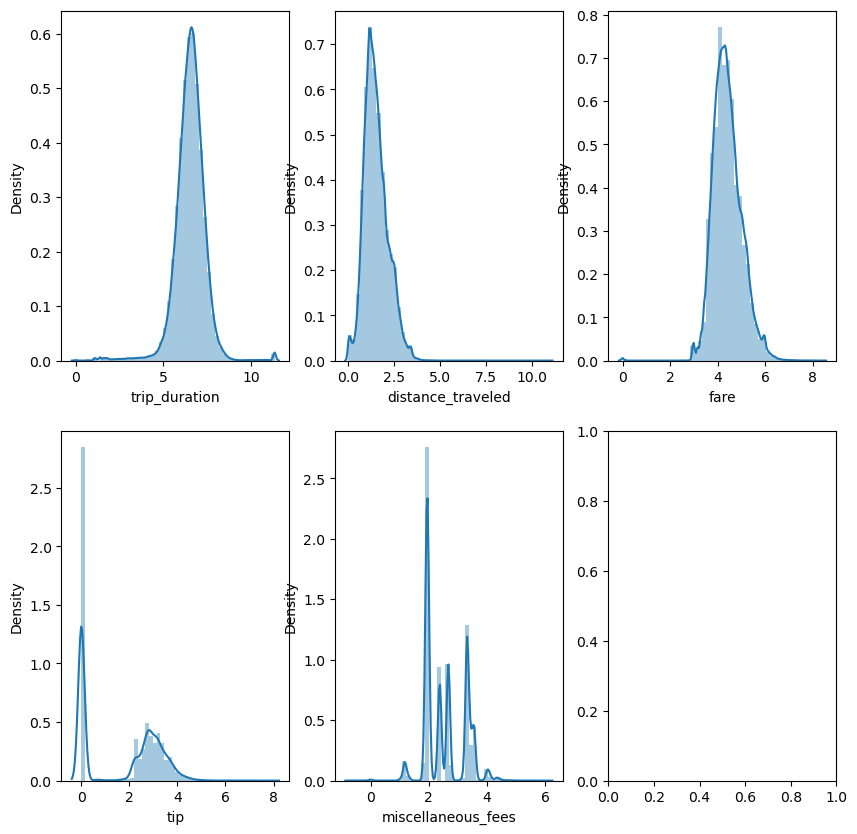

In [20]:
fig, axis = plt.subplots(nrows = 2, ncols = 3, figsize = (10, 10))
k = 0
for i in range(2):
    if k == 5:
        break
    for j in range(3):
        sns.distplot(x = df_train[numerical_cols[k]], kde = True, ax = axis[i][j])
        axis[i][j].set_xlabel(numerical_cols[k])
        k = k + 1
plt.tight_layout()
plt.show()

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [34]:
ab = LinearRegression()

In [23]:
X = df_train.drop(columns = "total_fare")
y = df_train["total_fare"]

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [26]:
from sklearn.model_selection import cross_val_score

In [35]:
scores = cross_val_score(ab,X = X_train, y = y_train, cv = 5)

In [37]:
scores

array([0.72046302, 0.71115362, 0.73631932, 0.73285735, 0.77134036])

In [28]:
from sklearn.metrics import r2_score

In [39]:
ab.fit(X_train, y_train)
r2_score(y_test, ab.predict(X_test))

0.7019769796957113

Cross_val_score does not train the model.

In [40]:
scores

array([0.72046302, 0.71115362, 0.73631932, 0.73285735, 0.77134036])

In [45]:
from sklearn.metrics import mean_absolute_error

In [46]:
mean_absolute_error(y_test, lr.predict(X_test))

22.81755119674534

In [49]:
params = {"n_estimators" : [100, 150, 200, 250, 300, 350], "min_samples_split" : [2, 3, 4]}

In [50]:
rfr = RandomForestRegressor()

In [53]:
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [54]:
r2_score(y_test, rfr.predict(X_test))

0.995363298883665

In [51]:
obj = GridSearchCV(rfr, param_grid = params, cv = None)

In [48]:
df_train.shape

(209673, 8)